
# *Clustering*



## *Lab 1: Illustration of clustering techniques with real datasets*

 - Partitional clustering
 -  Quality indexes 
 -  Hierarchical clustering
 ## 1 - Data Presentation

In [32]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

#Library for scatterplot
import matplotlib.cm as cm

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [16]:
#Import data from dataset
df_food = pd.read_csv('food.csv',sep=';')
df_ruspini = pd.read_csv('ruspini.csv')

## Question 1 : *Load and describe the 2 datasets. Thanks to boxplots, try to highlight some outliers, if any*

In [17]:
df_food.describe()

,Energy,Protein,Fat,Calcium,Iron
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,207.407407,19.000000,13.481481,43.962963,2.381481
std,101.207806,4.251696,11.257033,78.034254,1.461305
min,45.000000,7.000000,1.000000,5.000000,0.500000
25%,135.000000,16.500000,5.000000,9.000000,1.350000
50%,180.000000,19.000000,9.000000,9.000000,2.500000
75%,282.500000,22.000000,22.500000,31.500000,2.600000
max,420.000000,26.000000,39.000000,367.000000,6.000000


In [18]:
df_ruspini = df_ruspini.drop(df_ruspini.columns[0], axis=1)
df_ruspini.describe()

,x,y
count,75.00000,75.000000
mean,54.88000,92.026667
std,30.50253,48.702620
min,4.00000,4.000000
25%,31.50000,56.500000
50%,52.00000,96.000000
75%,76.50000,141.500000
max,117.00000,156.000000


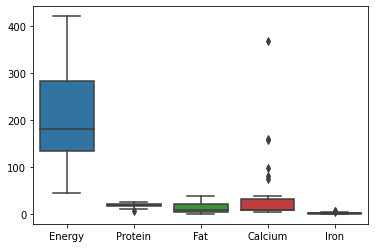

In [19]:
ax = sns.boxplot(data=df_food)

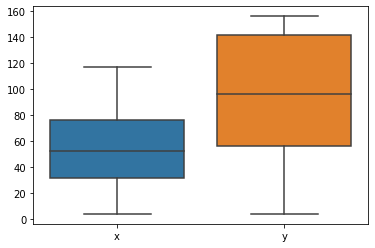

In [20]:
ax = sns.boxplot(data=df_ruspini)

## 2 - Partitional clustering and quality of a clustering


## Question 2 : *Plot the data in a 2D space. What can you say about the structure of the data? How many cluster do you expect to be found by the clustering algorithms?*

<AxesSubplot:xlabel='x', ylabel='y'>

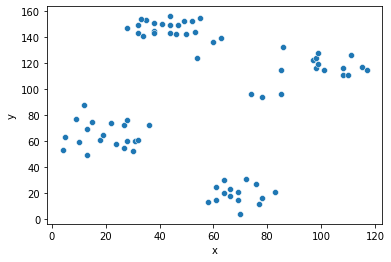

In [21]:
sns.scatterplot(data=df_ruspini, x="x", y="y")

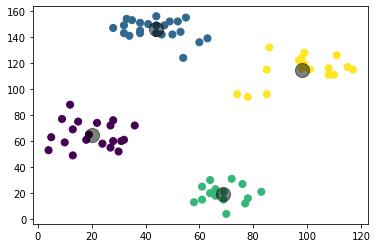

In [22]:
kmeans = KMeans(n_clusters=4).fit(df_ruspini)
y_kmeans = kmeans.predict(df_ruspini)

plt.scatter(df_ruspini['x'], df_ruspini['y'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Question 3 : *Try to tune some parameters found in help(kmeans) in order to fix the issue seen before.*

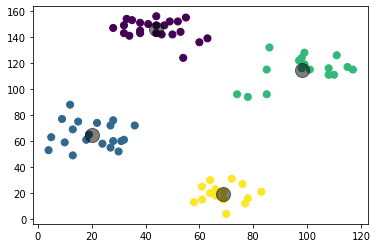

In [23]:
kmeans = KMeans(n_clusters=4, random_state=40).fit(df_ruspini)
y_kmeans = kmeans.predict(df_ruspini)

plt.scatter(df_ruspini['x'], df_ruspini['y'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

For n_clusters = 2 The average silhouette_score is : 0.5827264208152947
For n_clusters = 3 The average silhouette_score is : 0.6327047140348644
For n_clusters = 4 The average silhouette_score is : 0.7376569908806615
For n_clusters = 5 The average silhouette_score is : 0.7134788293039084
For n_clusters = 6 The average silhouette_score is : 0.6024928017585368
For n_clusters = 7 The average silhouette_score is : 0.48904629719578024
For n_clusters = 8 The average silhouette_score is : 0.48135845714912506
For n_clusters = 9 The average silhouette_score is : 0.48387659702612534
For n_clusters = 10 The average silhouette_score is : 0.49375397844907154


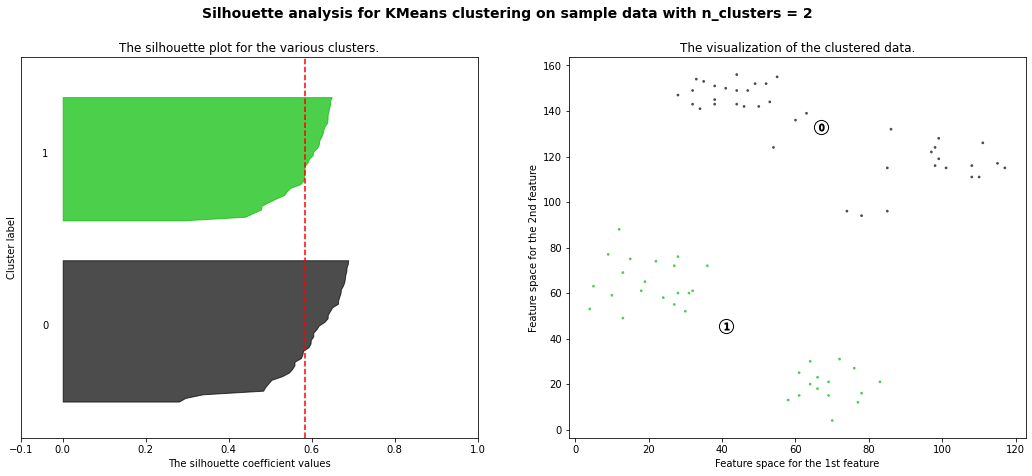

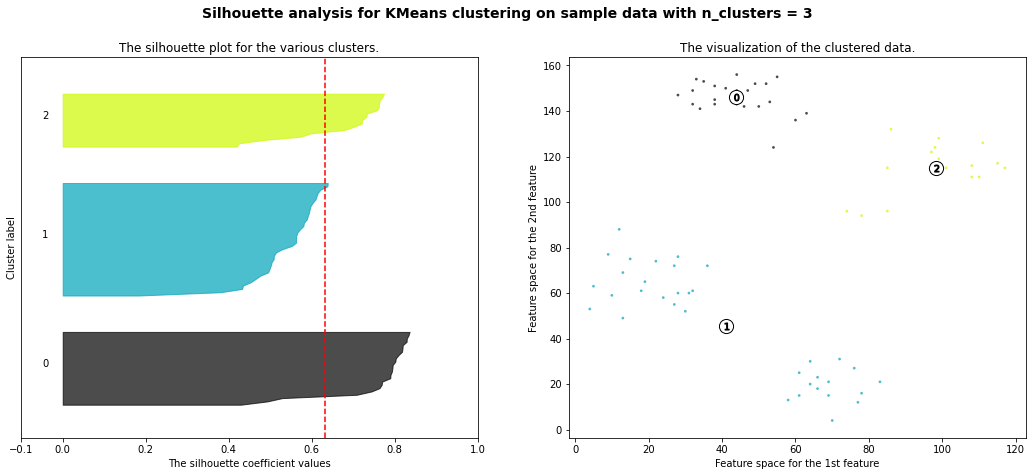

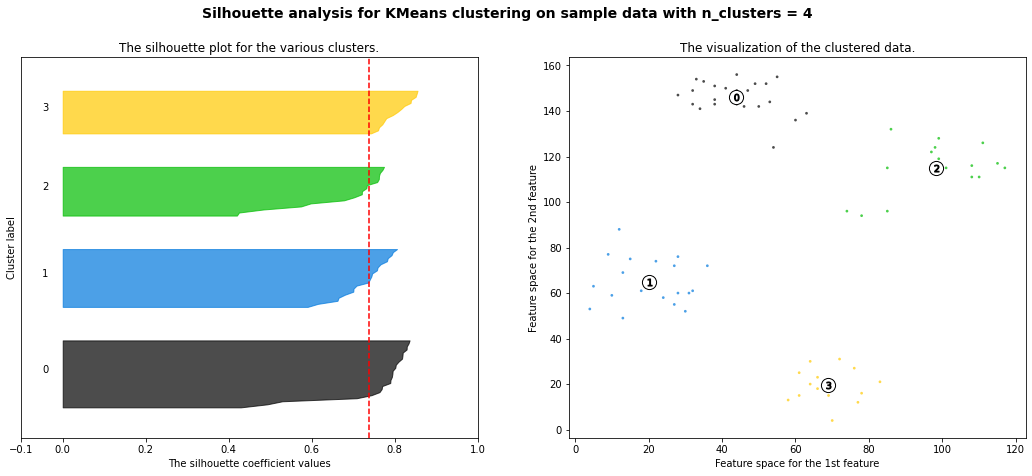

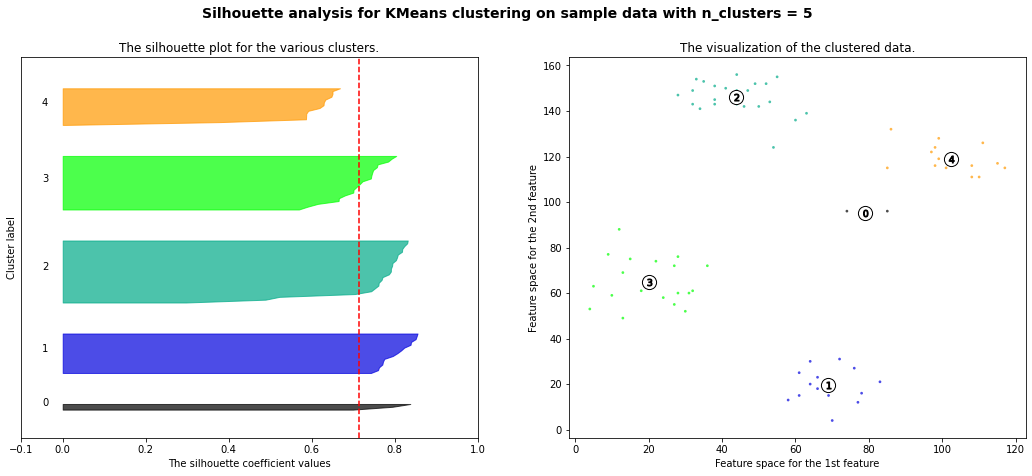

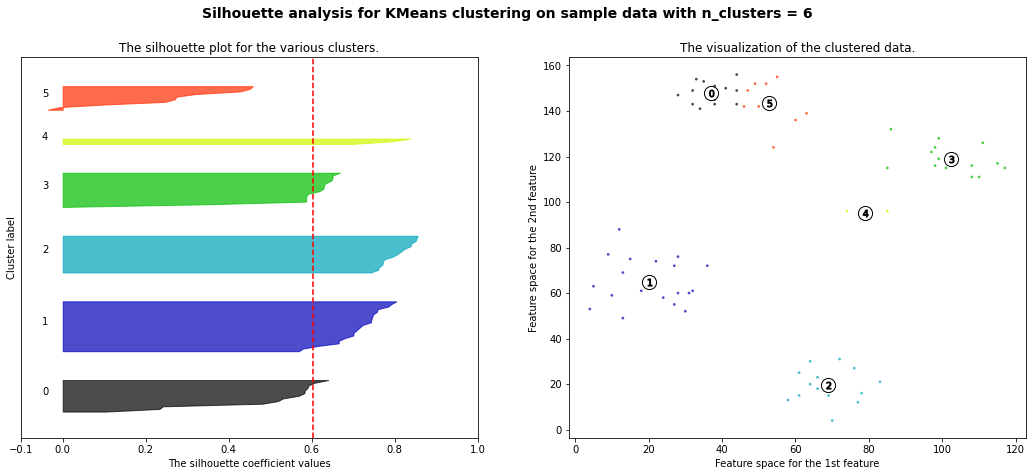

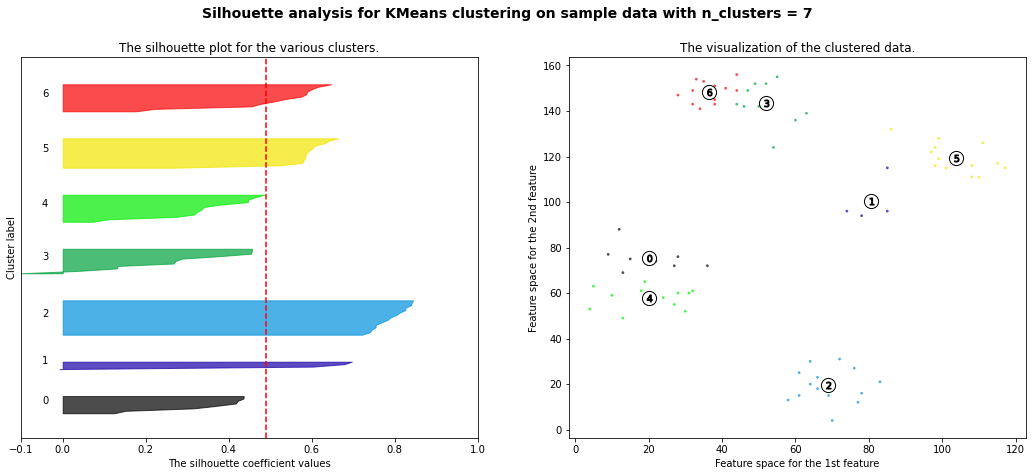

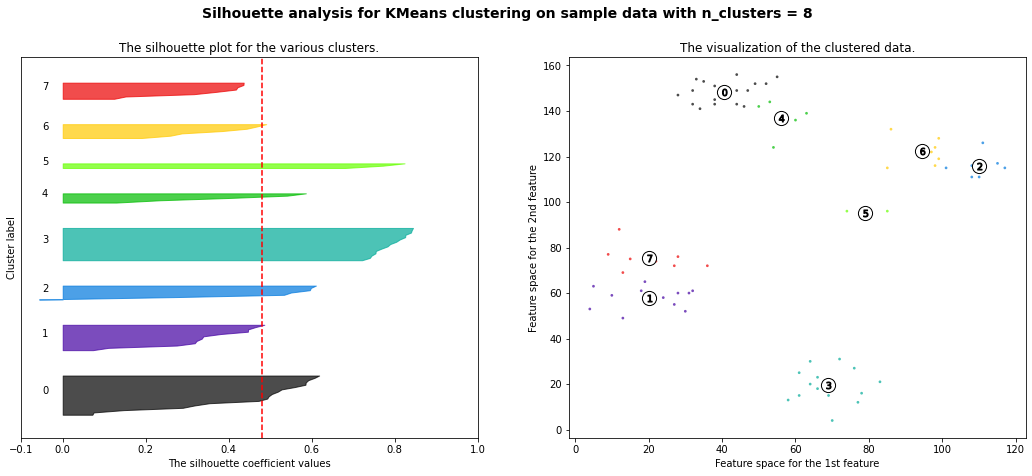

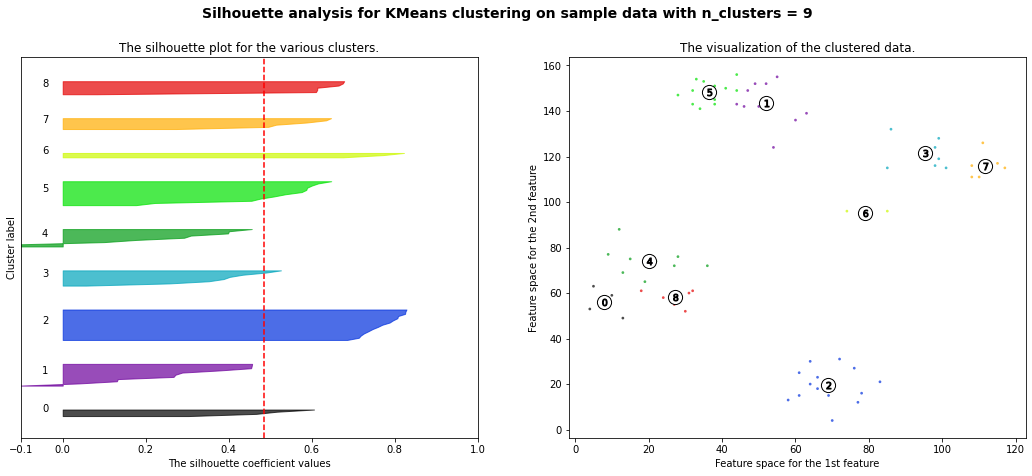

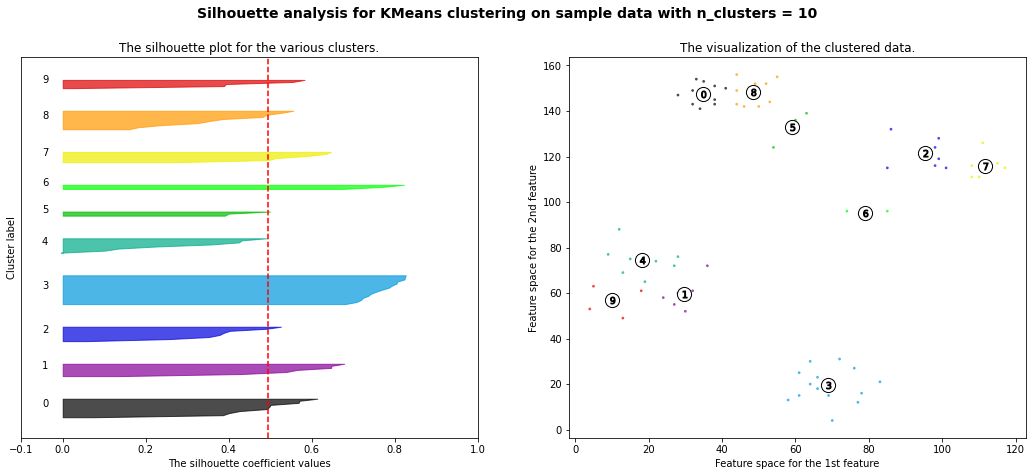

In [24]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_ruspini) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_ruspini)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_ruspini, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_ruspini, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_ruspini['x'], df_ruspini['y'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## 3 - Hierarchical clustering






In [66]:
df_food = df_food.drop(columns = ['Name'])
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_food)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_food, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_food, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples


For n_clusters = 2 The average silhouette_score is : 0.5275761268378671
For n_clusters = 3 The average silhouette_score is : 0.5583378267953667
For n_clusters = 4 The average silhouette_score is : 0.5468275112343609
For n_clusters = 5 The average silhouette_score is : 0.49999603015348426
For n_clusters = 6 The average silhouette_score is : 0.5288129792857025
For n_clusters = 7 The average silhouette_score is : 0.5276307542955673
For n_clusters = 8 The average silhouette_score is : 0.5116956926930514
For n_clusters = 9 The average silhouette_score is : 0.4928214246881057
For n_clusters = 10 The average silhouette_score is : 0.43557410367457894


In [27]:
# We now perform hierarchical clustering. 
my_food = df_food.drop(columns='Name')
# We standardize the columns of interest
food_scaled=pd.DataFrame(scale(my_food),columns=my_food.columns,index=my_food.index)  # scale(food) returns a numpy array, so use pd.Dataframe to reconstruct your dataframe
# print(food_scaled)

# We apply hierarchical clustering with dissimilarity measure "ward"
Z = linkage(food_scaled, 'ward') # 'average' is the method used to compute the distance. Metric is "euclidian" by default
print(Z)

[[ 0.         10.          0.06973555  2.        ]
 [11.         12.          0.18939102  2.        ]
 [ 6.         25.          0.21915945  2.        ]
 [27.         28.          0.41581508  4.        ]
 [ 1.          8.          0.4202579   2.        ]
 [ 3.         30.          0.57241854  5.        ]
 [ 4.         14.          0.75192779  2.        ]
 [20.         22.          0.78097139  2.        ]
 [ 5.         15.          0.79940943  2.        ]
 [18.         19.          0.80176192  2.        ]
 [21.         23.          0.94966792  2.        ]
 [ 9.         32.          0.95589543  6.        ]
 [13.         31.          1.02636494  3.        ]
 [16.         17.          1.08097041  2.        ]
 [29.         35.          1.6079578   4.        ]
 [26.         33.          1.84265596  3.        ]
 [34.         36.          1.92586168  4.        ]
 [ 2.         38.          2.11474542  7.        ]
 [41.         42.          2.47824624  7.        ]
 [37.         43.          3.02

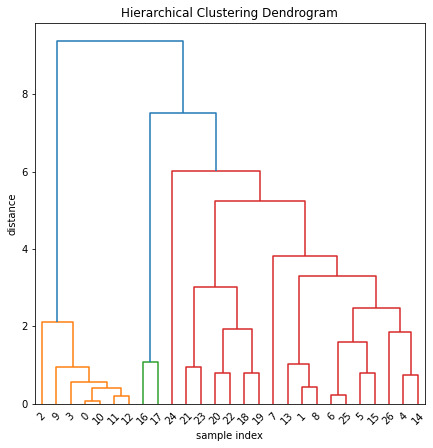

In [28]:
# We represent the corresponding Dendrogram
plt.figure(figsize=(7, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z = linkage(food_scaled, 'ward')
)
plt.show()

In [33]:
metrics=['euclidean','hamming', 'cityblock' , 'cosine'] # metrics used for linkage 
methods=['single','complete','average'] # methods used for linkage
pdists=['euclidean','minkowski','cityblock','cosine']  # metrics used for pdist()
max_val=0
best_metric=None
best_method=None
best_p_dist=None

for metric1 in metrics:
    for method1 in methods:
        for pdist1 in pdists:
            Z=linkage(food_scaled,method1,metric=metric1)
            c, coph_dists = cophenet(Z, pdist(food_scaled,pdist1))
            if (c>max_val):
                max_val=c
                best_metric=metric1
                best_method=method1
                best_p_dist=pdist1
            else:
                max_val=max_val
            print('(',method1,',',metric1,',',pdist1,') :',c)
print('the best cophenet index is about :',max_val,'which corresponds to the triple: (metric=',best_metric,',method=',best_method,'and pdist=',best_p_dist,')')

( single , euclidean , euclidean ) : 0.7749300289356731
( single , euclidean , minkowski ) : 0.7749300289356731
( single , euclidean , cityblock ) : 0.7319624291223596
( single , euclidean , cosine ) : 0.29720215086955576
( complete , euclidean , euclidean ) : 0.7136761439194088
( complete , euclidean , minkowski ) : 0.7136761439194088
( complete , euclidean , cityblock ) : 0.6986503309209111
( complete , euclidean , cosine ) : 0.5635440964728377
( average , euclidean , euclidean ) : 0.864670129695814
( average , euclidean , minkowski ) : 0.864670129695814
( average , euclidean , cityblock ) : 0.793164600040733
( average , euclidean , cosine ) : 0.46075921503405687
( single , hamming , euclidean ) : 0.2771964328633425
( single , hamming , minkowski ) : 0.2771964328633425
( single , hamming , cityblock ) : 0.2809623363988014
( single , hamming , cosine ) : 0.29764837142270345
( complete , hamming , euclidean ) : 0.3654986654600873
( complete , hamming , minkowski ) : 0.3654986654600873
